In [1]:
import numpy as np
import pandas as pd

# load the contents of a file into a pandas Dataframe
input_file = './datasets/titanic_dataset/original/train.csv'
df_titanic = pd.read_csv(input_file)

In [2]:
# how many rows and columns in the dataframe
df_titanic.shape

(891, 12)

In [3]:
# titles of the 12 columns
print (df_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# view the first 5 rows of the dataframe
pd.set_option('display.max_columns', None)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# how many missing values?
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# another way to determine the number of missing
# values in a dataframe.
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Does this dataframe have a named index? If so, what is it?
print (df_titanic.index.name)

None


In [10]:
# set the index
df_titanic.set_index("PassengerId", inplace=True)

pd.set_option('display.max_columns', None)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# how many rows and columns in the dataframe
# after the index has been set?
df_titanic.shape

(891, 11)

In [12]:
# extract the target attribute into its own dataframe
df_titanic_target = df_titanic.loc[:,['Survived']]

# create a dataframe that contains the 10 feature variables
df_titanic_features = df_titanic.drop(['Survived'], axis=1)

In [13]:
# what is the split between the two classes of the target variable?
df_titanic_target['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115a5b278>]],
      dtype=object)

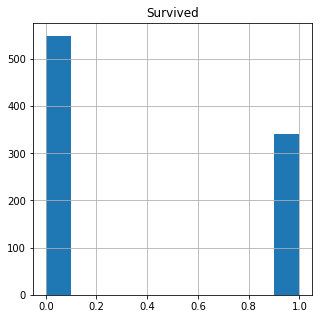

In [14]:
# historgram of target variable
%matplotlib inline
import matplotlib.pyplot as plt
df_titanic_target.hist(figsize=(5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115d72b70>,
      dtype=object)

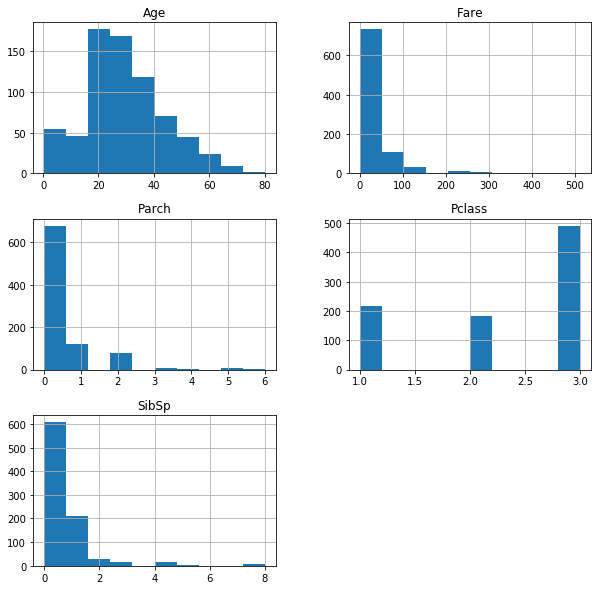

In [15]:
#histogram of all numeric features
df_titanic_features.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1161c1c88>]],
      dtype=object)

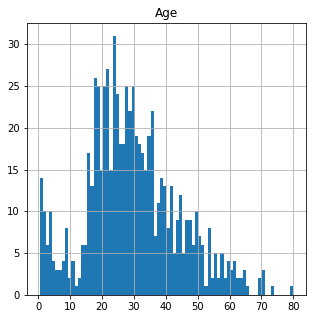

In [16]:
#histogram of single feature - Age
# it is a good idea to try different bin widtha to get a better idea of 
# the distribution of values.
df_titanic_features.hist(column='Age', figsize=(5,5), bins=80)

In [17]:
# uunique values and counts of categorical attribute 'Embarked'
# includes NaN markers
df_titanic_features['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

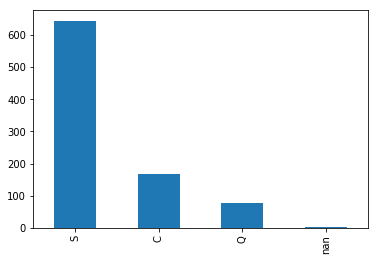

In [18]:
# histogram of categorical attribute 'Embarked'
# computed from the output of the value_counts() function
# includes NaN markers

vc = df_titanic_features['Embarked'].value_counts(dropna=False)
vc.plot(kind='bar')


In [19]:
# get statistical characteristics of the data
df_titanic_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


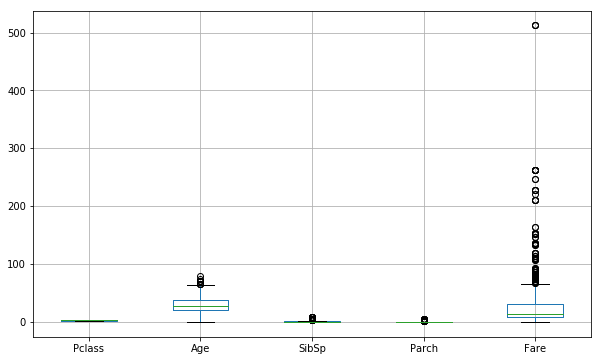

In [21]:
# create a box plot of numeric features.
df_titanic_features.boxplot(figsize=(10,6))

In [22]:
# correlation between the target variable and the features
df_titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
# what features show the strongest correlation with the target variable?
corr_matrix = df_titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1167acef0>,
      dtype=object)

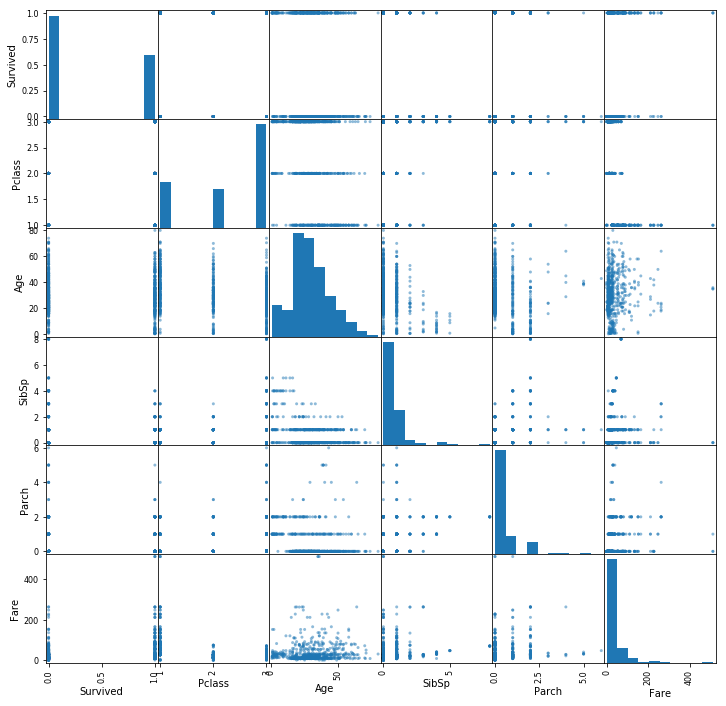

In [24]:
# visualize relationship between features using a
# matrix of scatter plots.
from pandas.plotting import scatter_matrix
scatter_matrix(df_titanic, figsize=(12,12))

In [ ]:
# load a 30 column dataset, to examine the behaviour of the head() function
input_file = './datasets/random_30column.csv'
df_random30 = pd.read_csv(input_file)
df_random30.head()

In [ ]:
pd.set_option('display.max_columns', 4)
df_random30.head()